In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import streamlit as st
from joblib import load
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, classification_report

In [2]:
df = pd.read_csv('C:/Users/HP/OneDrive/Desktop/Documents/Degree Stuff/heart.csv')

In [3]:
label_encoders = {}
for column in ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le  # Saving the encoder for potential future use

In [4]:
X = df.drop('HeartDisease', axis=1)  # Features
y = df['HeartDisease']  # Target

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
naive_bayes_model = GaussianNB()

In [13]:
naive_bayes_model.fit(X_train, y_train)


GaussianNB()

In [15]:
y_pred = naive_bayes_model.predict(X_test)


In [17]:
accuracy = accuracy_score(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)

In [19]:
accuracy, classification_rep

(0.8731884057971014,
 '              precision    recall  f1-score   support\n\n           0       0.82      0.88      0.85       112\n           1       0.91      0.87      0.89       164\n\n    accuracy                           0.87       276\n   macro avg       0.87      0.87      0.87       276\nweighted avg       0.88      0.87      0.87       276\n')

In [21]:
features_to_plot = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']


In [23]:
plt.figure(figsize=(18, 12))

<Figure size 1800x1200 with 0 Axes>

<Figure size 1800x1200 with 0 Axes>

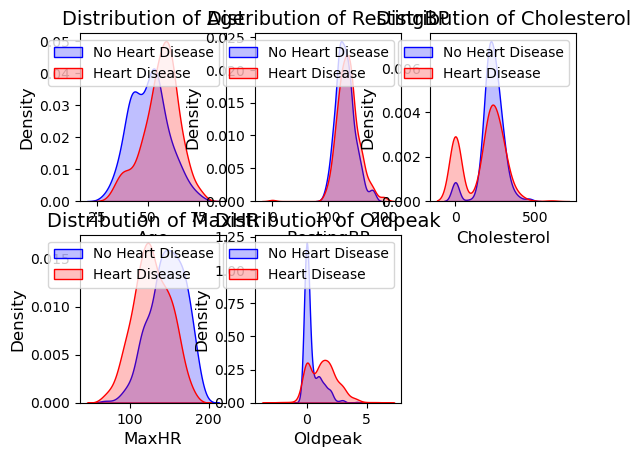

In [25]:
for i, feature in enumerate(features_to_plot, 1):
    plt.subplot(2, 3, i)
    sns.kdeplot(X_train[feature][y_train == 0], label='No Heart Disease', fill=True, color='blue')
    sns.kdeplot(X_train[feature][y_train == 1], label='Heart Disease', fill=True, color='red')
    plt.title(f'Distribution of {feature}', fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()


In [26]:
plt.subplots_adjust(hspace=0.4, wspace=0.4)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.suptitle('Feature Distributions by Heart Disease Status', fontsize=16)
plt.show()

<Figure size 640x480 with 0 Axes>